# `Exploratory data Analysis on Churn Modelling`

### Loading the dataset

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [230]:
data=pd.read_csv('Churn_Modelling.csv')

In [231]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [232]:
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [233]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [234]:
data.shape

(10000, 12)

In [235]:
data.isnull().sum()   # no null values

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


---

## `Univariate Analysis`

---

### `Catagorical`
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products

### Geography

In [236]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

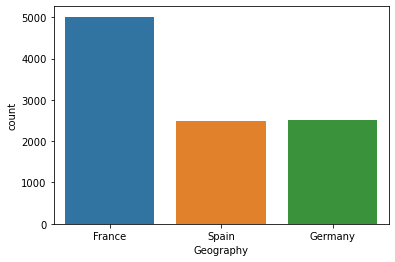

In [237]:
sns.countplot(data['Geography'])

#### `France has maximum customers`

### Gender

In [238]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

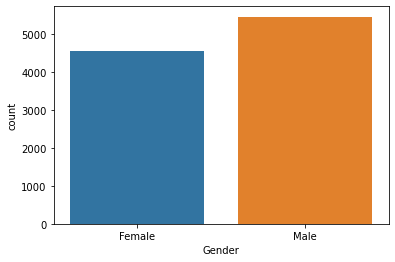

In [239]:
sns.countplot(data['Gender'])

#### `Maximum customers are of Gender Male`

### Has Credit Card

In [240]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

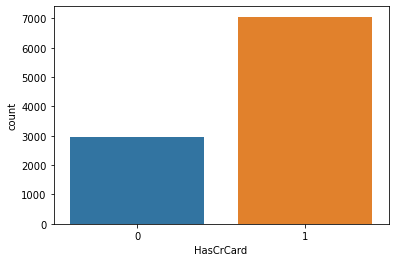

In [241]:
sns.countplot(data['HasCrCard'])

#### `Max customers have credit card`

### IsActiveMember

In [242]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

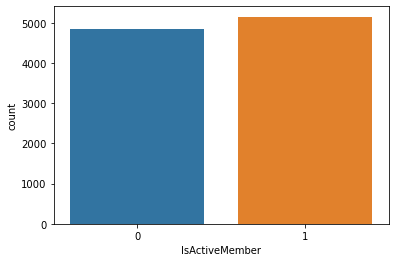

In [243]:
sns.countplot(data['IsActiveMember'])

#### `Maximum customers are active customers`

### Exited

In [244]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

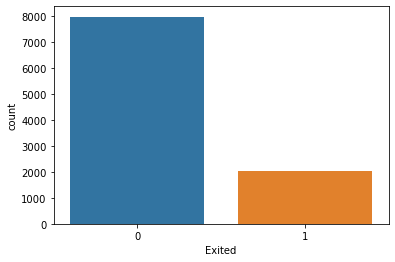

In [245]:
sns.countplot(data['Exited'])

#### `Maximum customers are not going to churn`

### Tenure

In [246]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0, 0.5, 'Number of Customers')

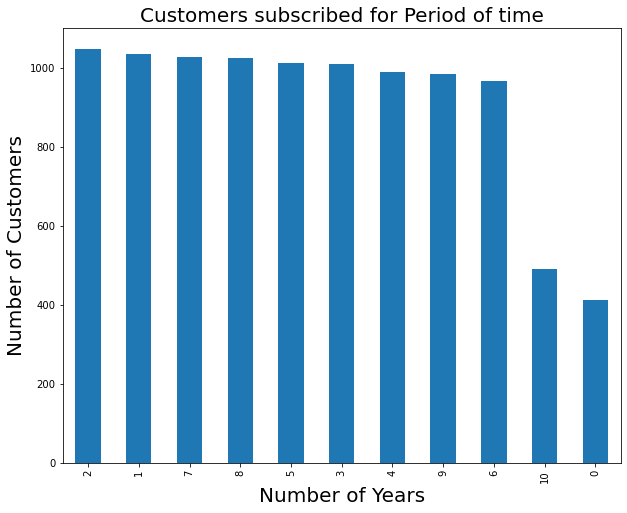

In [247]:
plt.figure(figsize=(10,8))
data['Tenure'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Customers subscribed for Period of time',fontsize=20)
plt.xlabel('Number of Years',fontsize=20)
plt.ylabel('Number of Customers',fontsize=20)

#### `These customers had subscribed for a good amount of time`

### No of Products

Text(0.5, 1.0, 'Customers subscribed for Products')

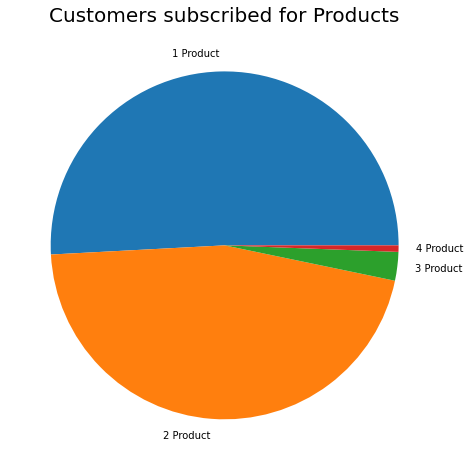

In [248]:
plt.figure(figsize=(10,8))
plt.pie(data['NumOfProducts'].value_counts(),labels=['1 Product','2 Product','3 Product','4 Product']);
plt.title('Customers subscribed for Products',fontsize=20)

In [249]:
print(f'{5084/100}% Customers subscribed for 1 product')
print(f'{4590/100}% Customers subscribed for 2 products')
print(f'{266/100}% Customers subscribed for 3 products')
print(f'{60/100}% Customers subscribed for 4 products')

50.84% Customers subscribed for 1 product
45.9% Customers subscribed for 2 products
2.66% Customers subscribed for 3 products
0.6% Customers subscribed for 4 products


### `Numerical`
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary

### CreditScore

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

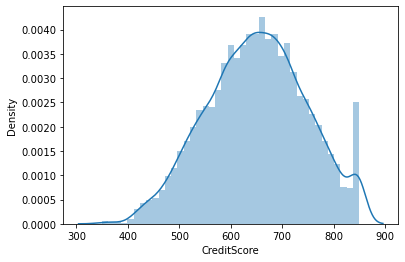

In [250]:
sns.distplot(data['CreditScore'])

<AxesSubplot:xlabel='CreditScore'>

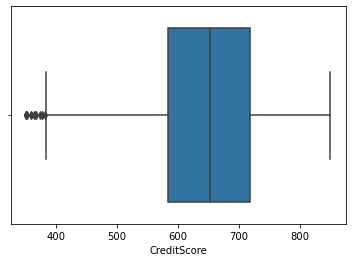

In [251]:
sns.boxplot(data['CreditScore'])

In [252]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [253]:
q1=np.percentile(data['CreditScore'],25)
q3=np.percentile(data['CreditScore'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:383.0 and Upper Bound:919.0


In [254]:
# CODE HERE
data = data[data['CreditScore'] > lower_bound]   # remove outliers
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### `Population has a mean CreditScore of 650`

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

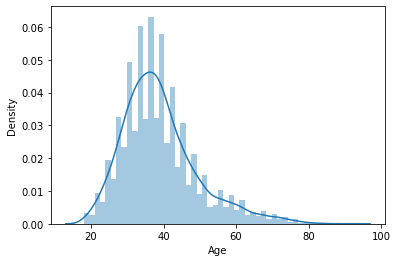

In [255]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

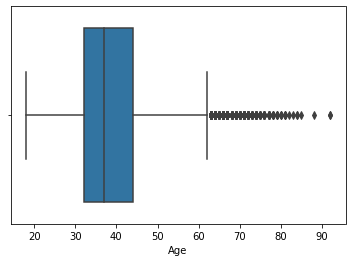

In [256]:
sns.boxplot(data['Age'])

In [257]:
data['Age'].describe()

count    9984.000000
mean       38.914263
std        10.487614
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

#### `finding quartiles to detect outliers`

In [384]:
q1=np.percentile(data['Age'],25)
q3=np.percentile(data['Age'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value

In [385]:
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: 14.5
Upper Bound: 58.5


#### `remove outliers ` 

In [386]:
# data.loc[data.Age > upper_bound, 'Age'] = upper_bound    

In [387]:
# data[data['Age'] > upper_bound]['Age']

In [388]:
# CODE HERE
data = data[data['Age'] <  upper_bound]   # remove outliers
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:xlabel='Age'>

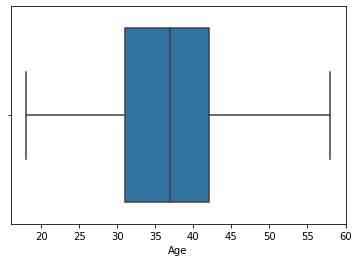

In [389]:
sns.boxplot(data['Age'])

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Density'>

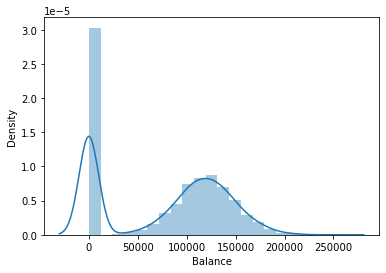

In [390]:
sns.distplot(data['Balance'])

<AxesSubplot:xlabel='Balance'>

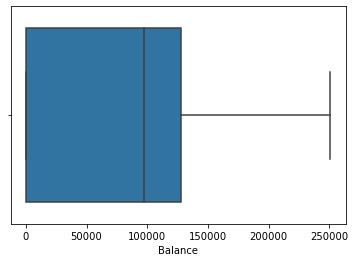

In [264]:
sns.boxplot(data['Balance'])

In [265]:
data['Balance'].describe()

count      9573.000000
mean      76535.269043
std       62422.667025
min           0.000000
25%           0.000000
50%       97257.410000
75%      127655.220000
max      250898.090000
Name: Balance, dtype: float64

#### `Zero Bank Balance`

In [266]:
data[data['Balance'] == 0].shape

(3461, 12)

In [267]:
data['Balance'].shape

(9573,)

In [268]:
total_percentage_of_customers_having_zero_balance=3617/100
print(f'{total_percentage_of_customers_having_zero_balance}%')

36.17%


#### `36.17% customers do not have any money in there bank balance`

### Estimated Salary

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

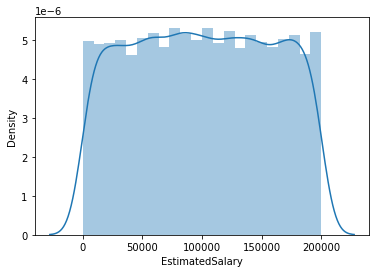

In [269]:
sns.distplot(data['EstimatedSalary'])

<AxesSubplot:xlabel='EstimatedSalary'>

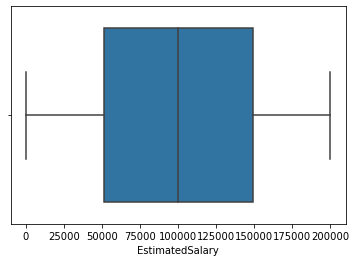

In [270]:
sns.boxplot(data['EstimatedSalary'])

In [271]:
data['EstimatedSalary'].describe()

count      9573.000000
mean     100137.024645
std       57512.047240
min          11.580000
25%       51112.800000
50%      100187.430000
75%      149418.410000
max      199992.480000
Name: EstimatedSalary, dtype: float64

#### `Uniformly Distributed Estimated Salary`

------

----------

## `Bivariate Analysis between all columns, useful for Feature Engineering and Feature Selection`

-----------

### `Hypothesis testing On Churn Modeling Dataset`

### `Cat vs Cat : Chi-Square Test`

###  Geography vs Gender

In [272]:
two_way_frquency=pd.crosstab(data['Geography'],data['Gender'])
two_way_frquency

Gender,Female,Male
Geography,,
France,2156,2646
Germany,1147,1260
Spain,1041,1323


In [273]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [274]:
p_value   # p-value < 0.05 --- accept alternate hypothesis

0.027461481825621106

#### `Geography and Gender are related`

###  HasCrCard vs Gender

In [275]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Gender'])
two_way_frquency

Gender,Female,Male
HasCrCard,,
0,1291,1527
1,3053,3702


In [276]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [277]:
p_value  # p_value > 0.05 -------- accept null hypothesis

0.5963553825549729

#### `HasCrCard and Gender are not related`

###  IsActiveMember vs Gender

In [278]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Gender'])
two_way_frquency

Gender,Female,Male
IsActiveMember,,
0,2212,2550
1,2132,2679


In [279]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [280]:
p_value # p-value < .05 ---- accept alternate hypothesis

0.037682576162831875

#### `Gender and IsActive Member are not related`

###  Geography vs Exited

In [281]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4033,769
Germany,1635,772
Spain,1978,386


In [282]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [283]:
p_value # p-value < .05 ---- accept alternate hypothesis

1.0652251938333508e-62

#### `Geography and Exited are related`

---

### `Num vs Num : Correlation Test`

###  Age vs CreditScore

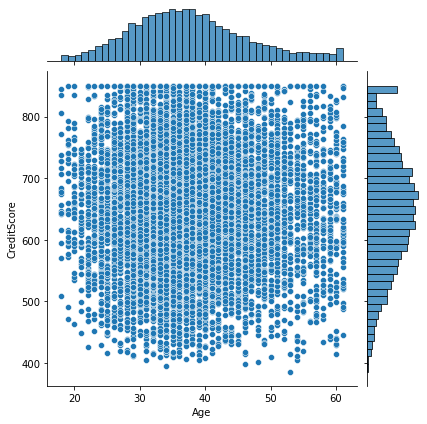

In [284]:
sns.jointplot('Age','CreditScore',data=data)

In [285]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['CreditScore'])

In [286]:
correlation    # weak or no association

-0.012952755953813217

In [287]:
p_value    # accept null hypothesis 

0.2050811259554618

#### `Age and CreditScore are not related`

###  Age vs Balance

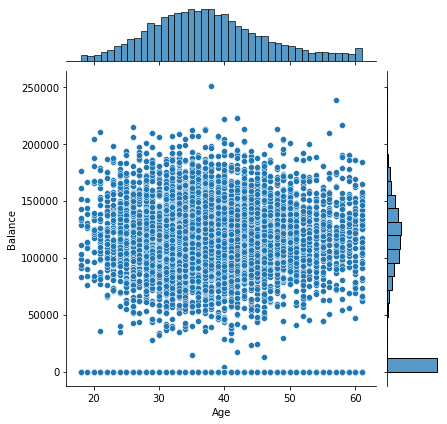

In [288]:
sns.jointplot('Age','Balance',data=data)

In [289]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Age'],data['Balance'])

In [290]:
p_value   # reject null hypothesis

3.994261460666832e-05

In [291]:
correlation   # weak association

0.04197123727956334

#### `Age and Balance are related -----------**** Suspicious ****`

###  EsimatedSalary vs Balance

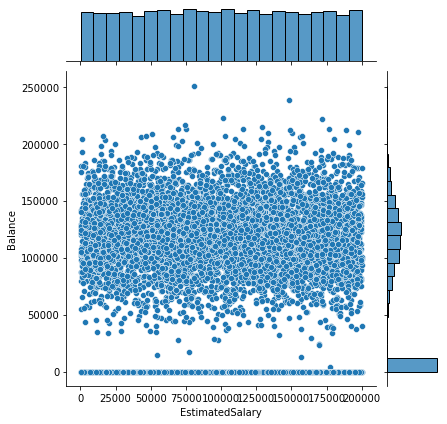

In [292]:
sns.jointplot('EstimatedSalary','Balance',data=data)

In [293]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['Balance'])

In [294]:
correlation   # weak association

0.010524249502772223

In [295]:
p_value    # accept null hypothesis

0.3031956531548595

#### `EstimatedSalary and Balance are not related`

###  CreditScore vs EstimatedSalary

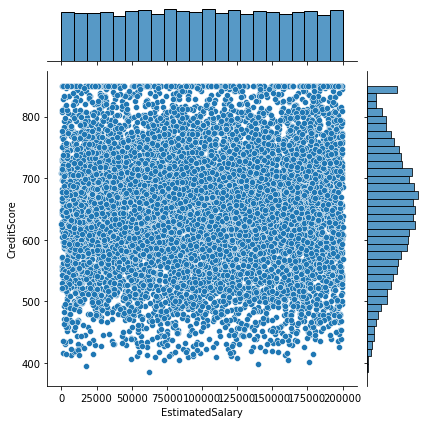

In [296]:
sns.jointplot('EstimatedSalary','CreditScore',data=data)

In [297]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['EstimatedSalary'],data['CreditScore'])

In [298]:
correlation

0.00202084096436293

In [299]:
p_value    # accept null hypothesis

0.8432822028302961

#### `EstimatedSalary and CreditScore are not related`

###  CreditScore Vs Balance

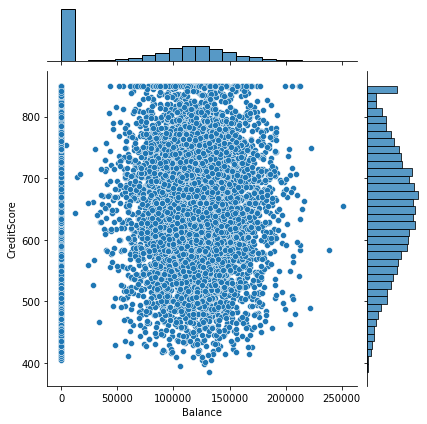

In [300]:
sns.jointplot('Balance','CreditScore',data=data)

In [301]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Balance'],data['CreditScore'])

In [302]:
correlation

0.008359858329200356

In [303]:
p_value   # Accept null hypothesis

0.4134426694178408

#### `Balance and CreditScore are not related`

---

## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


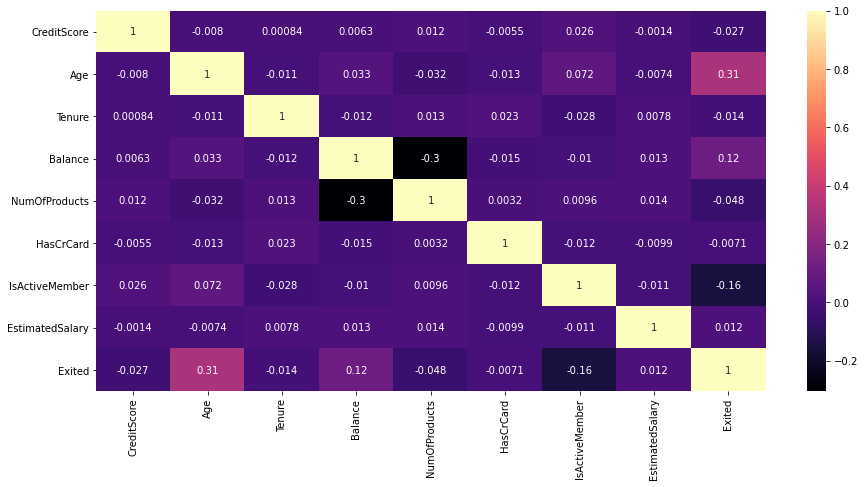

In [74]:
plt.figure(figsize=(15,7))
corr_mat = data.corr()

sns.heatmap(corr_mat,annot=True,cmap='magma')
plt.show()

## `Cat vs Num : T and Anova Test`

--------

## `EstimatedSalary`

### vs Gender 

In [75]:
grp_female = data.loc[data["Gender"]=='Female','EstimatedSalary']
grp_male = data.loc[data["Gender"]=='Male','EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.8111794562250657, pvalue=0.4172819312945406)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

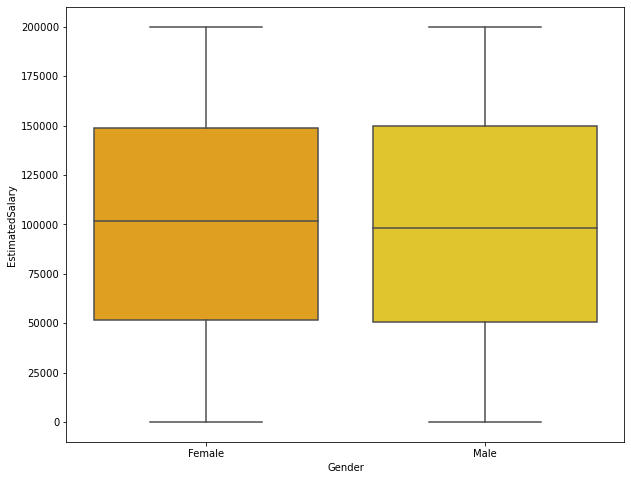

In [334]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Gender',data=data,palette='Wistia_r')

#### `EstimatedSalary and Balance are not related`

### vs HasCrCard

In [76]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'EstimatedSalary']
no_CrCard = data.loc[data["HasCrCard"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.9932911327221926, pvalue=0.32059213597636266)

<AxesSubplot:xlabel='HasCrCard', ylabel='EstimatedSalary'>

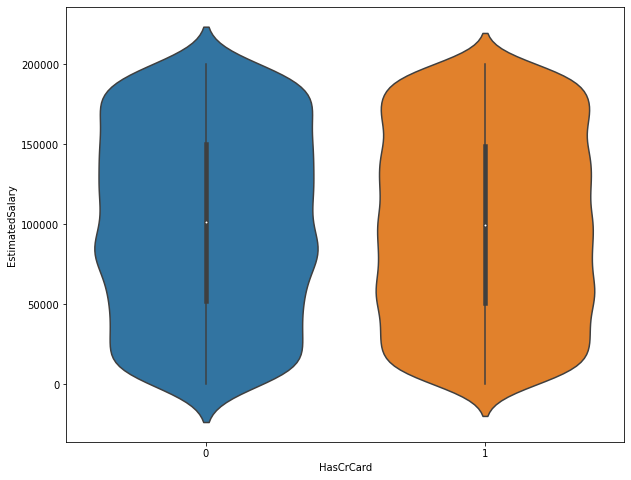

In [318]:
plt.figure(figsize=(10,8))
sns.violinplot(y='EstimatedSalary',x='HasCrCard',data=data)

#### `HasCrCard and EstimatedSalary are not related`

### vs IsActiveMember

In [77]:
yes_active = data.loc[data["IsActiveMember"]==1,'EstimatedSalary']
no_active = data.loc[data["IsActiveMember"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-1.1421033240697918, pvalue=0.2534384248255728)

<AxesSubplot:xlabel='IsActiveMember', ylabel='EstimatedSalary'>

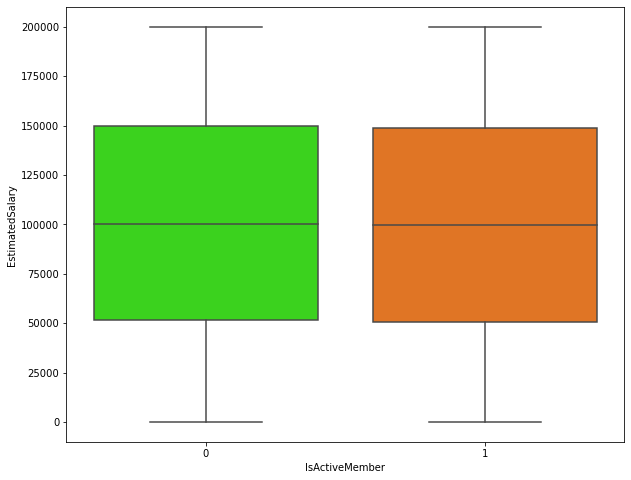

In [337]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='IsActiveMember',data=data,palette='gist_ncar')

#### `IsActiveMember and EstimatedSalary are not related`

### vs Exited

In [78]:
yes_churn = data.loc[data["Exited"]==1,'EstimatedSalary']
no_churn = data.loc[data["Exited"]==0,'EstimatedSalary']
from scipy.stats import ttest_ind
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=1.2096536380192642, pvalue=0.22644042802223346)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

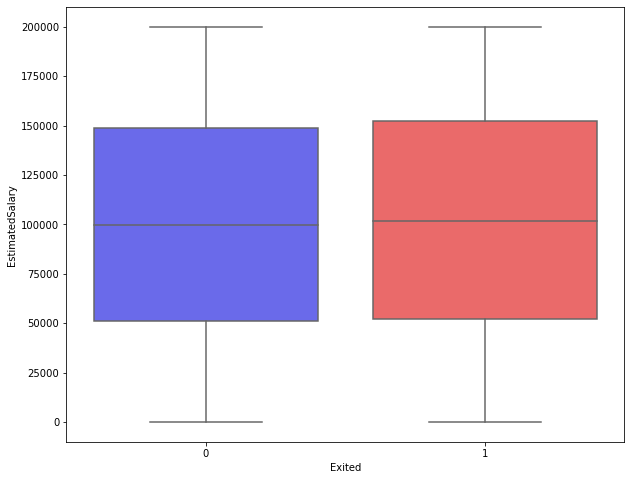

In [339]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data,palette='seismic')

#### `Exited and EstimatedSalary are not related`

### vs No Of Products

In [322]:
grp_1 = data.loc[data["NumOfProducts"]==1,'EstimatedSalary']
grp_2 = data.loc[data["NumOfProducts"]==2,'EstimatedSalary']
grp_3 = data.loc[data["NumOfProducts"]==3,'EstimatedSalary']
grp_4 = data.loc[data["NumOfProducts"]==4,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.6027147709895766, pvalue=0.6131808314711454)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

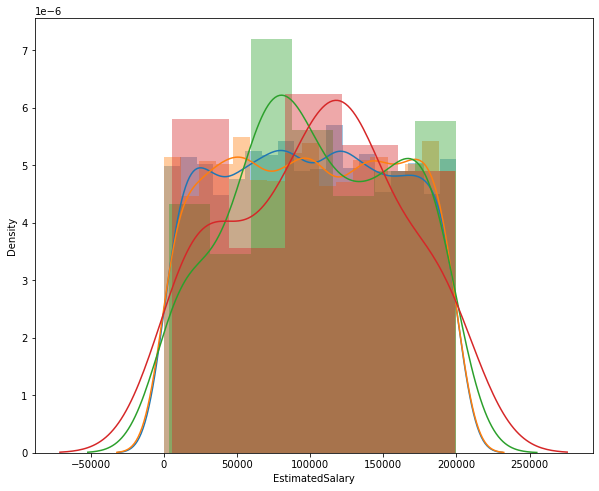

In [340]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)
sns.distplot(grp_4)

#### `No of Products and EstimatedSalary are not related`

### vs Geography 

In [326]:
grp_france = data.loc[data["Geography"]=='France','EstimatedSalary']
grp_germany = data.loc[data["Geography"]=='Germany','EstimatedSalary']
grp_spain = data.loc[data["Geography"]=='Spain','EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.8533070782343696, pvalue=0.42603618187571646)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

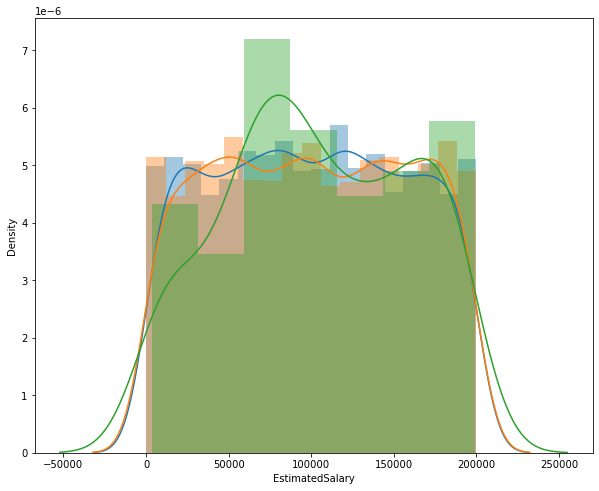

In [341]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### ` Geography and EstimatedSalary are not related`

### vs Tenure

In [81]:
grp_0 = data.loc[data["Tenure"]==0,'EstimatedSalary']
grp_1 = data.loc[data["Tenure"]==1,'EstimatedSalary']
grp_2 = data.loc[data["Tenure"]==2,'EstimatedSalary']
grp_3 = data.loc[data["Tenure"]==3,'EstimatedSalary']
grp_4 = data.loc[data["Tenure"]==4,'EstimatedSalary']
grp_5 = data.loc[data["Tenure"]==5,'EstimatedSalary']
grp_6 = data.loc[data["Tenure"]==6,'EstimatedSalary']
grp_7 = data.loc[data["Tenure"]==7,'EstimatedSalary']
grp_8 = data.loc[data["Tenure"]==8,'EstimatedSalary']
grp_9 = data.loc[data["Tenure"]==9,'EstimatedSalary']
grp_10 = data.loc[data["Tenure"]==10,'EstimatedSalary']
grp_11 = data.loc[data["Tenure"]==11,'EstimatedSalary']
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.613685551817579, pvalue=0.803587997402111)

<AxesSubplot:xlabel='Tenure', ylabel='EstimatedSalary'>

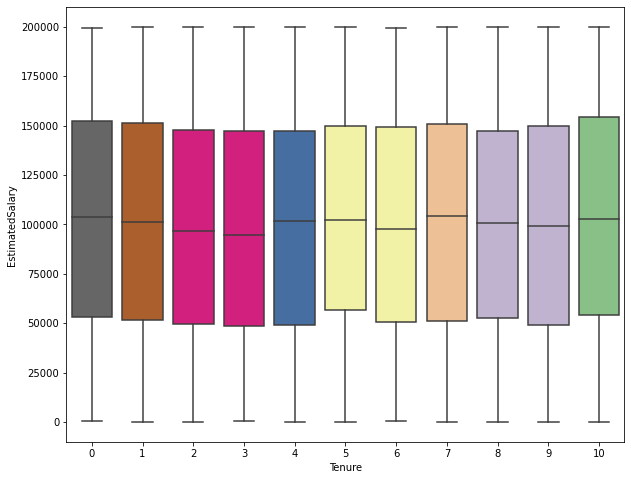

In [343]:
plt.figure(figsize=(10,8))
sns.boxplot(y='EstimatedSalary',x='Tenure',data=data,palette='Accent_r')

#### ` Tenure and EstimatedSalary are not related`

---

## `Balance`

---

### vs Gender

In [82]:
grp_female = data.loc[data["Gender"]=='Female','Balance']
grp_male = data.loc[data["Gender"]=='Male','Balance']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=-1.2086242759422712, pvalue=0.22683580909200307)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

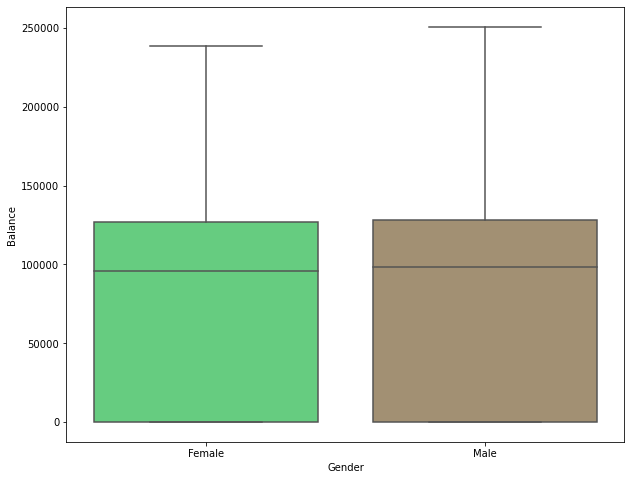

In [346]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='terrain')

#### `Balance and Gender are not related`

### vs HasCrCard

In [347]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Balance']
no_CrCard = data.loc[data["HasCrCard"]==0,'Balance']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.2041092873411852, pvalue=0.22857711795042765)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

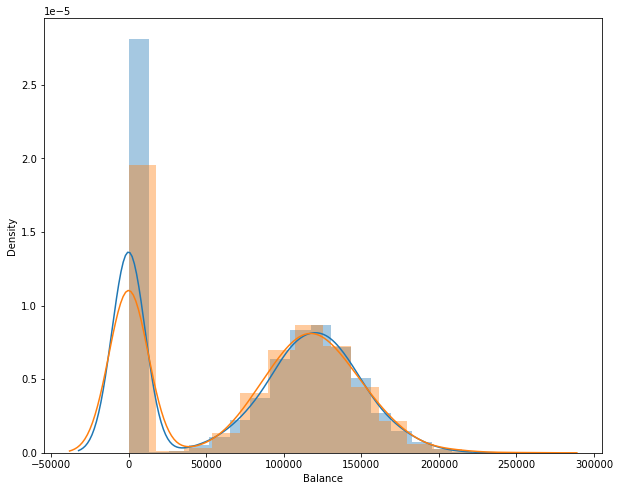

In [348]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `Balance and HasCrCard are not related`

### vs IsActiveMember

In [84]:
yes_active = data.loc[data["IsActiveMember"]==1,'Balance']
no_active = data.loc[data["IsActiveMember"]==0,'Balance']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=-1.0083604687166907, pvalue=0.31330584623768265)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Balance'>

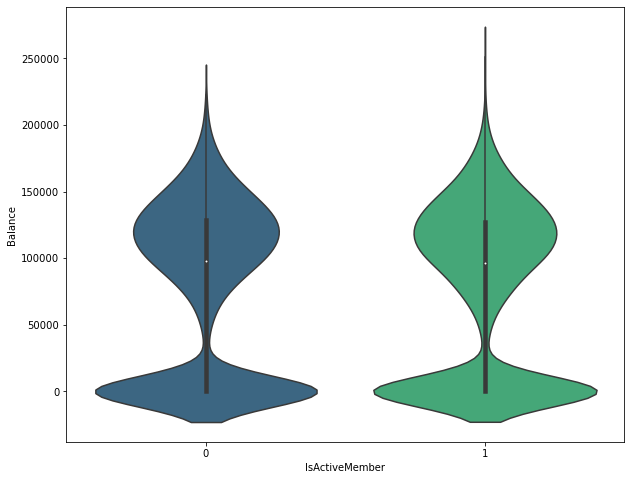

In [351]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='IsActiveMember',data=data,palette='viridis')

#### `Balance and IsActiveMember are not related`

### vs Exited

In [85]:
yes_churn = data.loc[data["Exited"]==1,'Balance']
no_churn = data.loc[data["Exited"]==0,'Balance']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=11.936240300013841, pvalue=1.2755633191525477e-32)

<AxesSubplot:xlabel='Gender', ylabel='Balance'>

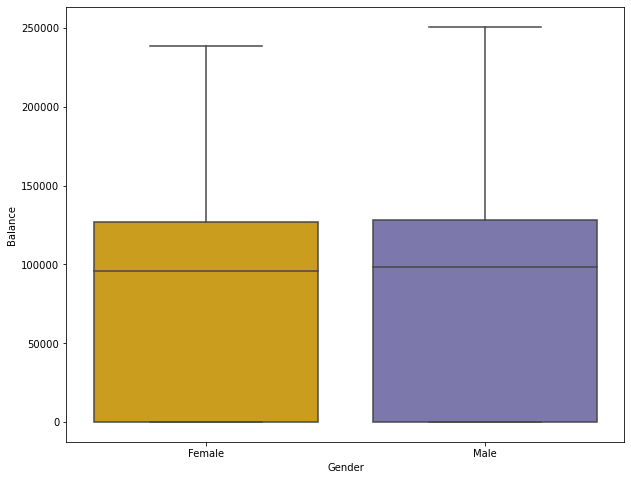

In [360]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Balance',x='Gender',data=data,palette='Dark2_r')

#### `Balance and Exited are related`

### vs NoOfProducts

In [86]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Balance']
grp_2 = data.loc[data["NumOfProducts"]==2,'Balance']
grp_3 = data.loc[data["NumOfProducts"]==3,'Balance']
grp_4 = data.loc[data["NumOfProducts"]==4,'Balance']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=521.9871533041903, pvalue=3.6991202e-315)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

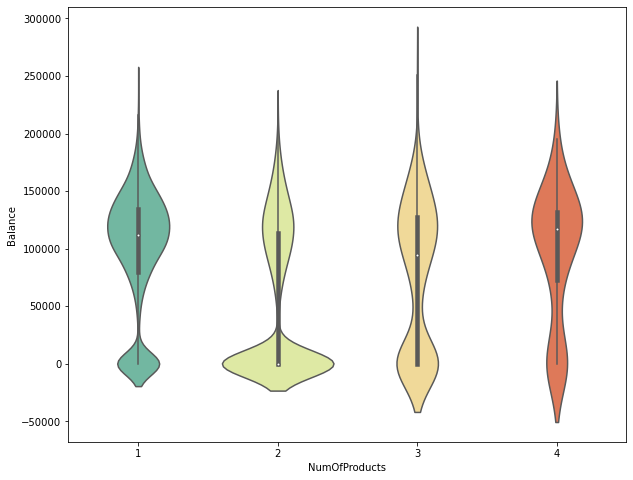

In [363]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='NumOfProducts',data=data,palette='Spectral_r')

#### `Balance and NoOfProducts are related`

### vs Geography

In [87]:
grp_france = data.loc[data["Geography"]=='France','Balance']
grp_germany = data.loc[data["Geography"]=='Germany','Balance']
grp_spain = data.loc[data["Geography"]=='Spain','Balance']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=958.4254463368385, pvalue=0.0)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

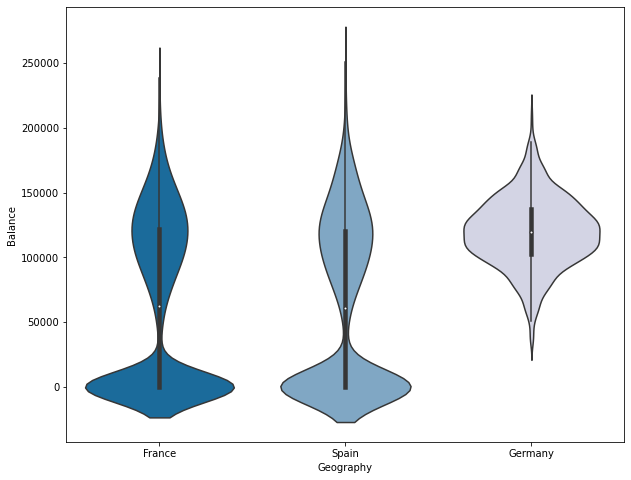

In [367]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Geography',data=data,palette='PuBu_r')

#### `Balance and Geography are related`

### vs Tenure

In [88]:
grp_0 = data.loc[data["Tenure"]==0,'Balance']
grp_1 = data.loc[data["Tenure"]==1,'Balance']
grp_2 = data.loc[data["Tenure"]==2,'Balance']
grp_3 = data.loc[data["Tenure"]==3,'Balance']
grp_4 = data.loc[data["Tenure"]==4,'Balance']
grp_5 = data.loc[data["Tenure"]==5,'Balance']
grp_6 = data.loc[data["Tenure"]==6,'Balance']
grp_7 = data.loc[data["Tenure"]==7,'Balance']
grp_8 = data.loc[data["Tenure"]==8,'Balance']
grp_9 = data.loc[data["Tenure"]==9,'Balance']
grp_10 = data.loc[data["Tenure"]==10,'Balance']
grp_11 = data.loc[data["Tenure"]==11,'Balance']

In [89]:
from scipy.stats import f_oneway

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.6935811144374311, pvalue=0.7314558778094197)

<AxesSubplot:xlabel='Tenure', ylabel='Balance'>

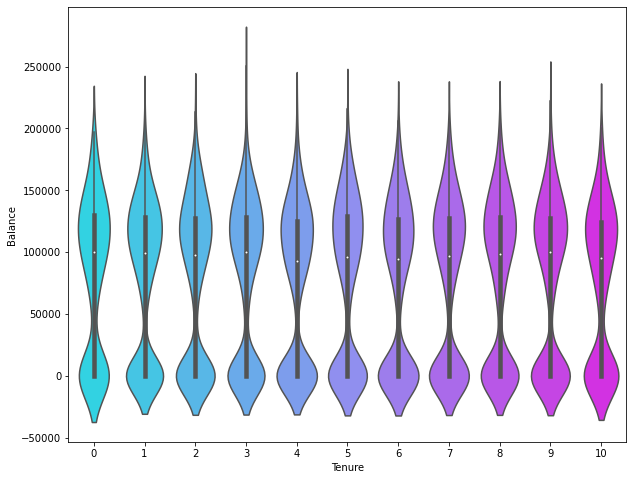

In [375]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Balance',x='Tenure',data=data,palette='cool')

#### `Balance and Tenure are not related`

---

## `Age`

---

### vs Gender

In [391]:
grp_female = data.loc[data["Gender"]=='Female','Age']
grp_male = data.loc[data["Gender"]=='Male','Age']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=3.422851846326496, pvalue=0.0006223221447970591)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

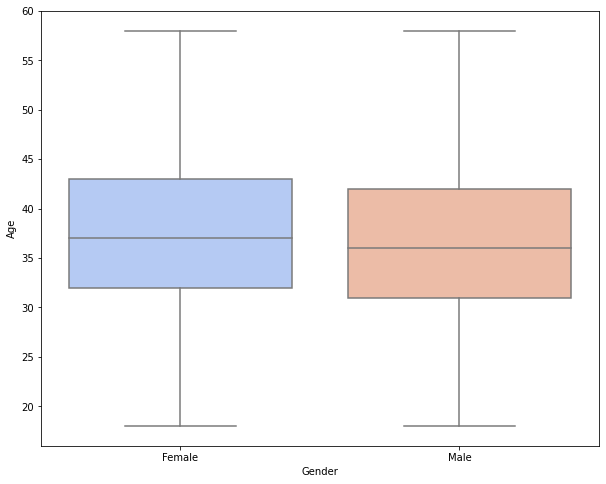

In [396]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Gender',data=data,palette='coolwarm')

#### `Age and Gender are related`

### vs HasCrCard

In [397]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'Age']
no_CrCard = data.loc[data["HasCrCard"]==0,'Age']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-1.7267212731647754, pvalue=0.08425060478652883)

<AxesSubplot:xlabel='Age', ylabel='Density'>

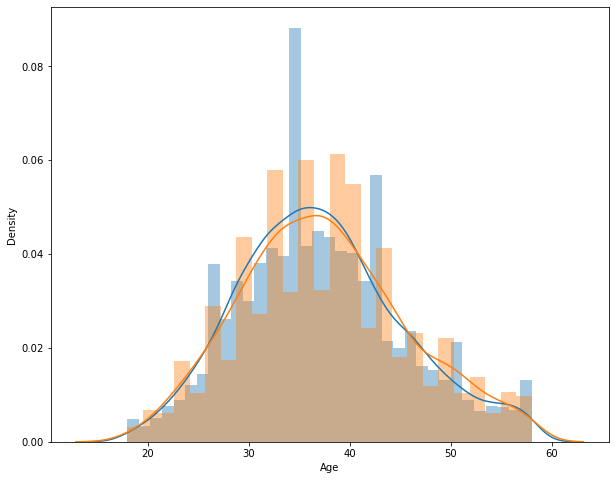

In [398]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `Age and HasCrCard are not related`

### vs IsActiveMember

In [92]:
yes_active = data.loc[data["IsActiveMember"]==1,'Age']
no_active = data.loc[data["IsActiveMember"]==0,'Age']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=7.263906412618832, pvalue=4.041364570154806e-13)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

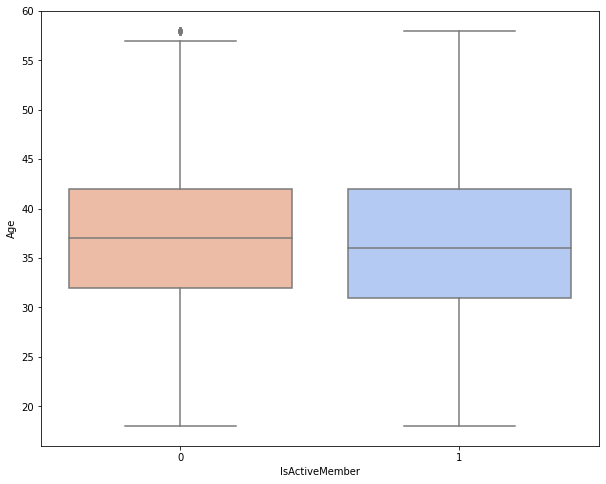

In [400]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='IsActiveMember',data=data,palette='coolwarm_r')

#### `Age and IsActiveMember are related`

### vs Exited

In [93]:
yes_churn = data.loc[data["Exited"]==1,'Age']
no_churn = data.loc[data["Exited"]==0,'Age']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=32.88677660692836, pvalue=2.5610544037367625e-225)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

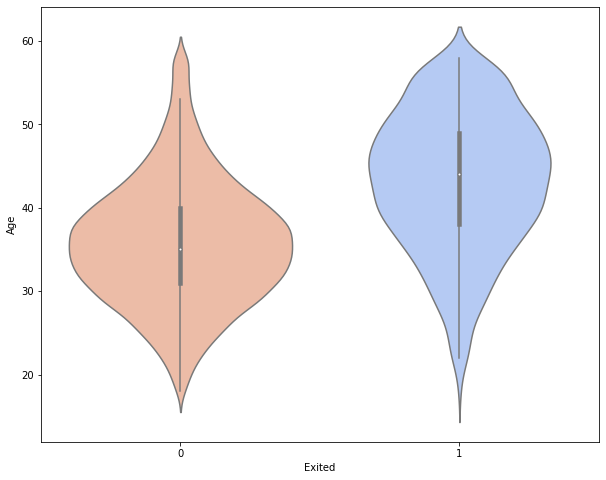

In [401]:
plt.figure(figsize=(10,8))
sns.violinplot(y='Age',x='Exited',data=data,palette='coolwarm_r')

#### `Age and Exited are related`

### vs NoOfProducts

In [94]:
grp_1 = data.loc[data["NumOfProducts"]==1,'Age']
grp_2 = data.loc[data["NumOfProducts"]==2,'Age']
grp_3 = data.loc[data["NumOfProducts"]==3,'Age']
grp_4 = data.loc[data["NumOfProducts"]==4,'Age']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=60.27159544391257, pvalue=1.3077780175644288e-38)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Age'>

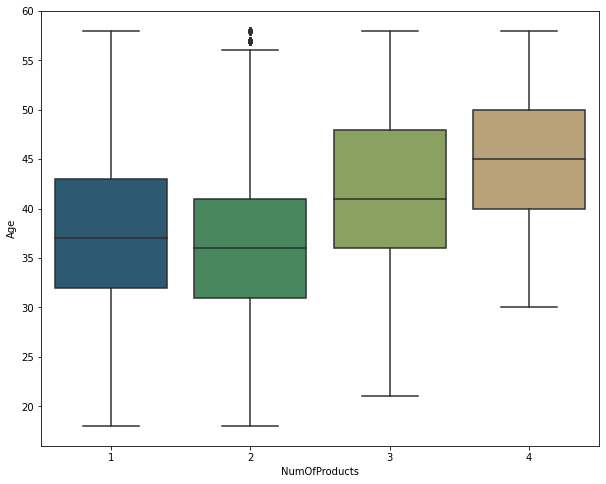

In [411]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='NumOfProducts',data=data,palette='gist_earth')

#### `Age and NumOfProducts are related`

### vs Geography

In [95]:
grp_france = data.loc[data["Geography"]=='France','Age']
grp_germany = data.loc[data["Geography"]=='Germany','Age']
grp_spain = data.loc[data["Geography"]=='Spain','Age']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=14.299617537901918, pvalue=6.289573291620452e-07)

<AxesSubplot:xlabel='Geography', ylabel='Age'>

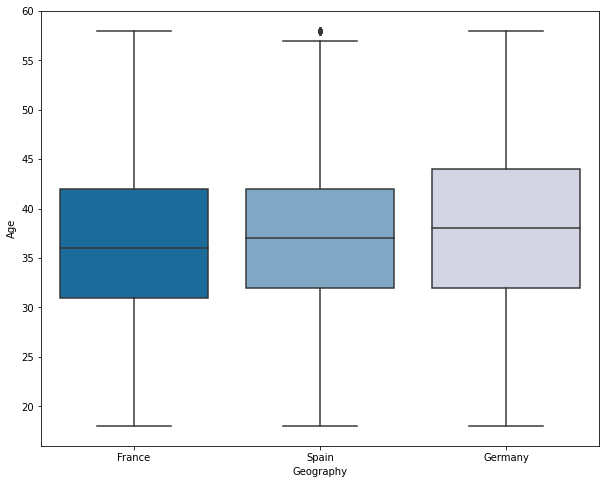

In [413]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Geography',data=data,palette='PuBu_r')

#### `Age and Geography are related`

### vs Tenure

In [96]:
grp_0 = data.loc[data["Tenure"]==0,'Age']
grp_1 = data.loc[data["Tenure"]==1,'Age']
grp_2 = data.loc[data["Tenure"]==2,'Age']
grp_3 = data.loc[data["Tenure"]==3,'Age']
grp_4 = data.loc[data["Tenure"]==4,'Age']
grp_5 = data.loc[data["Tenure"]==5,'Age']
grp_6 = data.loc[data["Tenure"]==6,'Age']
grp_7 = data.loc[data["Tenure"]==7,'Age']
grp_8 = data.loc[data["Tenure"]==8,'Age']
grp_9 = data.loc[data["Tenure"]==9,'Age']
grp_10 = data.loc[data["Tenure"]==10,'Age']
grp_11 = data.loc[data["Tenure"]==11,'Age']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=1.4265938488961298, pvalue=0.16139581440398384)

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

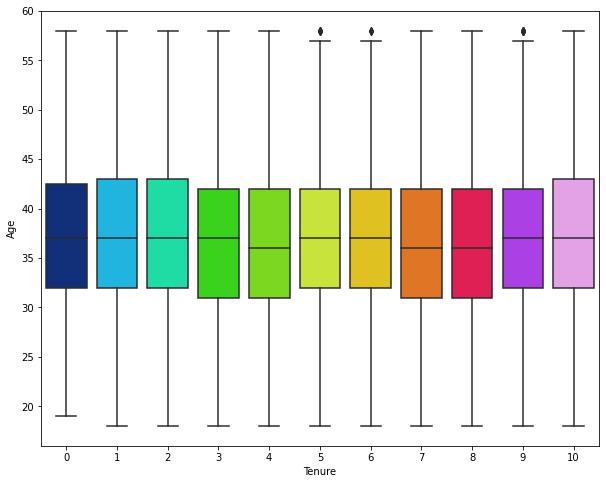

In [418]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Age',x='Tenure',data=data,palette='gist_ncar')

#### `Age and Tenure are not related`

## `CreditScore`

### vs Gender

In [97]:
grp_female = data.loc[data["Gender"]=='Female','CreditScore']
grp_male = data.loc[data["Gender"]=='Male','CreditScore']
ttest_results = ttest_ind(grp_female,grp_male)
ttest_results

Ttest_indResult(statistic=0.2856346098463999, pvalue=0.7751639097068665)

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

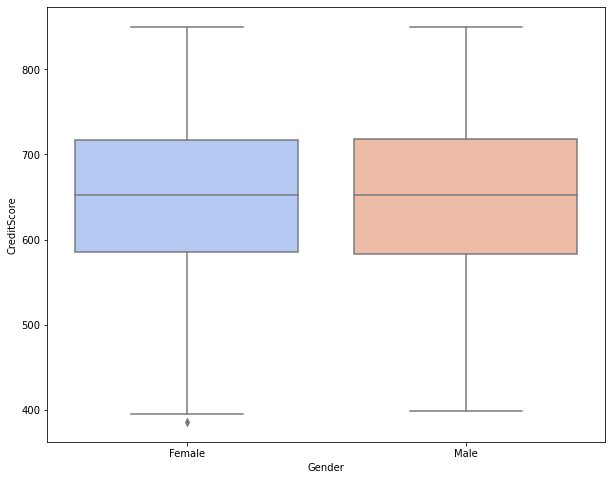

In [419]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Gender',data=data,palette='coolwarm')

#### `CredirScore and Gender are not related`

### vs HasCrCard

In [420]:
yes_CrCard = data.loc[data["HasCrCard"]==1,'CreditScore']
no_CrCard = data.loc[data["HasCrCard"]==0,'CreditScore']
ttest_results = ttest_ind(yes_CrCard,no_CrCard)
ttest_results

Ttest_indResult(statistic=-0.4598202881687651, pvalue=0.6456558597503093)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

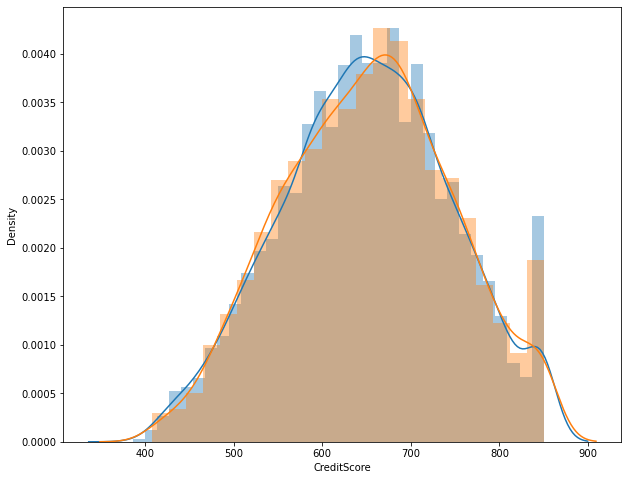

In [421]:
plt.figure(figsize=(10,8))
sns.distplot(yes_CrCard)
sns.distplot(no_CrCard)

#### `CreditScore and HasCrCard are not related`

### vs IsActiveMember

In [99]:
yes_active = data.loc[data["IsActiveMember"]==1,'CreditScore']
no_active = data.loc[data["IsActiveMember"]==0,'CreditScore']
ttest_results = ttest_ind(yes_active,no_active)
ttest_results

Ttest_indResult(statistic=2.5657200507183093, pvalue=0.010310632507972201)

<AxesSubplot:xlabel='IsActiveMember', ylabel='CreditScore'>

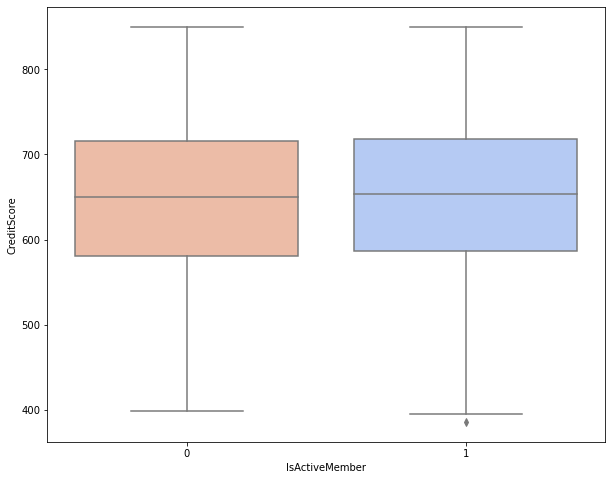

In [422]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='IsActiveMember',data=data,palette='coolwarm_r')

#### `CreditScore and IsActiveMember are not related`

### vs Exited

In [100]:
yes_churn = data.loc[data["Exited"]==1,'CreditScore']
no_churn = data.loc[data["Exited"]==0,'CreditScore']
ttest_results = ttest_ind(yes_churn,no_churn)
ttest_results

Ttest_indResult(statistic=-2.7100778888729833, pvalue=0.006738213892192373)

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

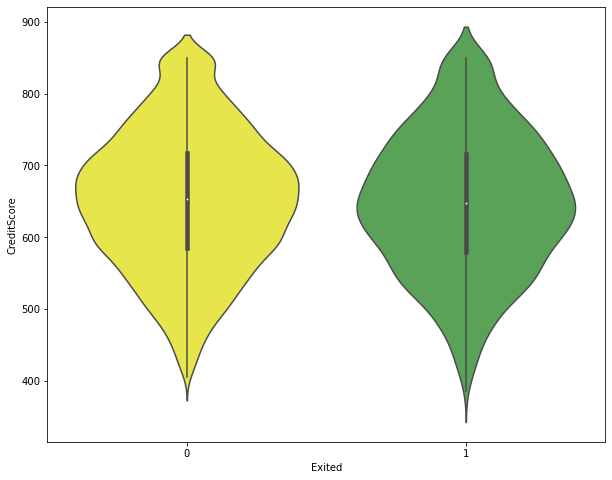

In [428]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='Exited',data=data,palette='Set1_r')

#### `CreditScore and Exited are not related`

### NumOfProducts

In [101]:
grp_1 = data.loc[data["NumOfProducts"]==1,'CreditScore']
grp_2 = data.loc[data["NumOfProducts"]==2,'CreditScore']
grp_3 = data.loc[data["NumOfProducts"]==3,'CreditScore']
grp_4 = data.loc[data["NumOfProducts"]==4,'CreditScore']
f_oneway(grp_1,grp_2,grp_3,grp_4)

F_onewayResult(statistic=0.8864761142070923, pvalue=0.4472040985916901)

<AxesSubplot:xlabel='NumOfProducts', ylabel='CreditScore'>

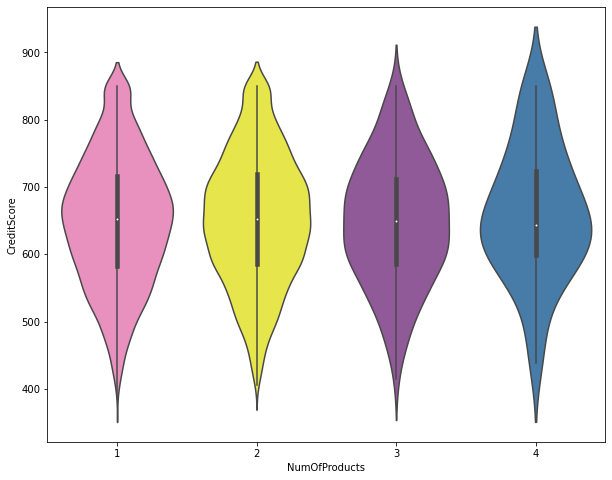

In [429]:
plt.figure(figsize=(10,8))
sns.violinplot(y='CreditScore',x='NumOfProducts',data=data,palette='Set1_r')

#### `CreditScore and NumOfProducts are not related`

### vs Geography

In [430]:
grp_france = data.loc[data["Geography"]=='France','CreditScore']
grp_germany = data.loc[data["Geography"]=='Germany','CreditScore']
grp_spain = data.loc[data["Geography"]=='Spain','CreditScore']
f_oneway(grp_france,grp_germany,grp_spain)

F_onewayResult(statistic=0.7153007255569545, pvalue=0.48907165576711176)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

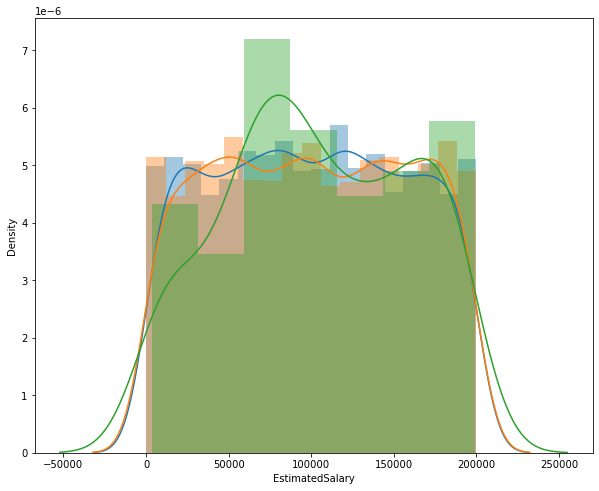

In [431]:
plt.figure(figsize=(10,8))
sns.distplot(grp_1)
sns.distplot(grp_2)
sns.distplot(grp_3)

#### `CreditScore and Geography are not related`

### vs Tenure

In [103]:
grp_0 = data.loc[data["Tenure"]==0,'CreditScore']
grp_1 = data.loc[data["Tenure"]==1,'CreditScore']
grp_2 = data.loc[data["Tenure"]==2,'CreditScore']
grp_3 = data.loc[data["Tenure"]==3,'CreditScore']
grp_4 = data.loc[data["Tenure"]==4,'CreditScore']
grp_5 = data.loc[data["Tenure"]==5,'CreditScore']
grp_6 = data.loc[data["Tenure"]==6,'CreditScore']
grp_7 = data.loc[data["Tenure"]==7,'CreditScore']
grp_8 = data.loc[data["Tenure"]==8,'CreditScore']
grp_9 = data.loc[data["Tenure"]==9,'CreditScore']
grp_10 = data.loc[data["Tenure"]==10,'CreditScore']
grp_11 = data.loc[data["Tenure"]==11,'CreditScore']

f_oneway(grp_0,grp_1,grp_2,grp_3,grp_4,grp_5,grp_6,grp_7,grp_8,grp_9,grp_10)

F_onewayResult(statistic=0.4641679040515924, pvalue=0.9137480759686244)

<AxesSubplot:xlabel='Tenure', ylabel='CreditScore'>

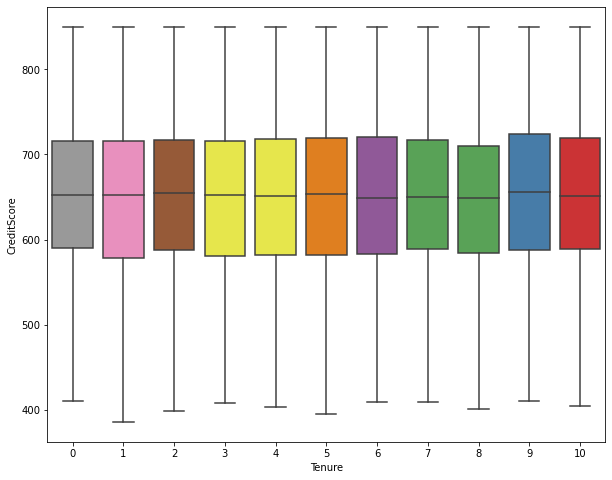

In [432]:
plt.figure(figsize=(10,8))
sns.boxplot(y='CreditScore',x='Tenure',data=data,palette='Set1_r')

#### `CreditScore and Tenure are not related`

-----

## `Conclusion of Bivariate Analysis #####################`:
### `Cat vs Cat`:
#### `Are Related`
> - `Geography and Gender are related`
> - `Geography and Exited are related`
#### `Are not Related`
> - ` Gender and HasCrCard are not related`
> - `Gender and IsActive Member are not related`
---
### `Num vs Num`:
#### `Are Related`
> - `Age and Balance are related`
#### `Are not Related`
> - `Age and CreditScore are not related`
> - `EstimatedSalary and Balance are not related`
> - `EstimatedSalary and CreditScore are not related`
> - `Balance and CreditScore are not related`

---
### `Cat vs Num`:
#### `Are Related`
> - `Balance and Exited are related`
> - `Balance and NoOfProducts are related`
> - `Balance and Geography are related`
> - `Balance and Tenure are related`
> - `Age and Gender are related`
> - `Age and IsActiveMember are related`
> - `Age and Exited are related`
> - `Age and NumOfProducts are related`
> - `Age and Geography are related`


#### `Are not Related`
> - `EstimatedSalary and Gender are not related`
> - `EstimatedSalary and HasCrCard are not related`
> - `EstimatedSalary and IsActiveMember are not related`
> - `EstimatedSalary and Exited are not related`
> - `EstimatedSalary and No of Products are not related`
> - `EstimatedSalary and Geography are not related`
> - `EstimatedSalary and Tenure are not related`
> - `Balance and Gender are not related`
> - `Balance and HasCrCard are not related`
> - `Balance and IsActiveMember are not related`
> - `Age and HasCrCard are not related`
> - `Age and Tenure are not related`
> - `CreditScore and Gender are not related`
> - `CreditScore and HasCrCard are not related`
> - `CreditScore and IsActiveMember are not related`
> - `CreditScore and Exited are not related`
> - `CreditScore and NumOfProducts are not related`
> - `CreditScore and Geography are not related`
> - `CreditScore and Tenure are not related`

-------

## `Bivariate Analysis regarding Target variable i.e Exited ---------------------`


## `Variables`
### Categorical:
> - Geography 
> - Gender
> - HasCrCard
> - IsActiveMember
> - Exited
> - Tenure
> - No Of Products


### Numerical:
> - CreditScore
> - Age 
> - Balance
> - EstimatedSalary


### CreditScore vs Exited

In [104]:
grp_retained = data.loc[data["Exited"]==0,'CreditScore']
grp_closed = data.loc[data["Exited"]==1,'CreditScore']

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

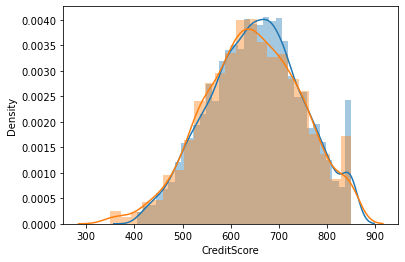

In [105]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [106]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [107]:
ttest_results

Ttest_indResult(statistic=2.7100778888729833, pvalue=0.006738213892192373)

#### `CreditScore and exited are related`

### Geography vs Exited

In [108]:
two_way_frquency=pd.crosstab(data['Geography'],data['Exited'])
two_way_frquency

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [109]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [110]:
p_value

3.8303176053541544e-66

#### `Geography and exited are related`

### Gender vs Exited

In [111]:
two_way_frquency=pd.crosstab(data['Gender'],data['Exited'])
two_way_frquency

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [112]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [113]:
p_value

2.2482100097131755e-26

#### `Gender and exited are related`

### Age vs Exited

In [114]:
grp_retained = data.loc[data["Exited"]==0,'Age']
grp_closed = data.loc[data["Exited"]==1,'Age']

<AxesSubplot:xlabel='Age', ylabel='Density'>

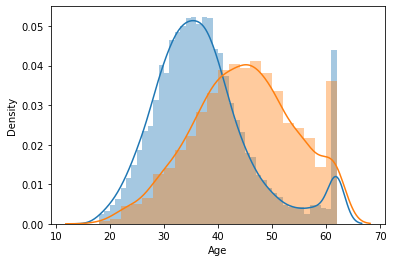

In [115]:
sns.distplot(grp_retained)
sns.distplot(grp_closed)

In [116]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [117]:
ttest_results

Ttest_indResult(statistic=-32.88677660692836, pvalue=2.5610544037367625e-225)

#### `Age and exited are related`

### Tenure vs Exited 

In [118]:
two_way_frquency=pd.crosstab(data['Tenure'],data['Exited'])
two_way_frquency

Exited,0,1
Tenure,,
0,318,95
1,803,232
2,847,201
3,796,213
4,786,203
5,803,209
6,771,196
7,851,177
8,828,197


In [119]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [120]:
p_value

0.17758462026413294

#### `Tenure and exited are related`

### HasCrCard vs Exited 

In [121]:
two_way_frquency=pd.crosstab(data['HasCrCard'],data['Exited'])
two_way_frquency

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [122]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [123]:
p_value

0.49237236141554686

#### `HasCrCard and exited are not related`

### IsAciveMember vs Exited

In [124]:
two_way_frquency=pd.crosstab(data['IsActiveMember'],data['Exited'])
two_way_frquency

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [125]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [126]:
p_value

8.785858269303703e-55

#### `IsActiveMember and exited are related`

### NoOfProducts vs Exited

In [127]:
two_way_frquency=pd.crosstab(data['NumOfProducts'],data['Exited'])
two_way_frquency

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [128]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)

In [129]:
p_value

0.0

#### `NoOfProducts and exited are related`

### Balance vs Exited

In [130]:
grp_retained = data.loc[data["Exited"]==0,'Balance']
grp_closed = data.loc[data["Exited"]==1,'Balance']

In [131]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [132]:
ttest_results

Ttest_indResult(statistic=-11.936240300013841, pvalue=1.2755633191525477e-32)

#### `Balance and exited are related`

### EstimatedSalary vs Exited

In [133]:
grp_retained = data.loc[data["Exited"]==0,'EstimatedSalary']
grp_closed = data.loc[data["Exited"]==1,'EstimatedSalary']

In [134]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(grp_retained,grp_closed)

In [135]:
ttest_results

Ttest_indResult(statistic=-1.2096536380192642, pvalue=0.22644042802223346)

#### `EstimatedSalary and exited are not related`

## `Conclusion regarding target variable -----------------------------`

### `Are related`:
> - `CreditScore and exited are related`
> - `Geography and exited are related`
> - `Gender and exited are related`
> - `Age and exited are related`
> - `Tenure and exited are related`
> - `IsActiveMember and exited are related`
> - `NoOfProducts and exited are related`
> - `Balance and exited are related`


### `Are not related`:
> - `HasCrCard and exited are not related`
> - `EstimatedSalary and exited are not related`

### `Gender, Geography vs Exited ( 2 way Anova )`

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('Exited ~ Gender + Geography + Gender:Geography', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Gender,16.983218,1.0,109.079287,2.106611e-25
Geography,47.446574,2.0,152.369197,6.542250e-66
Gender:Geography,0.187716,2.0,0.602828,5.472816e-01
Residual,1556.026650,9994.0,NaN,NaN


 `Since the p-values for Gender and Geography are both less than .05, this means that both factors have a statistically significant effect on Exited`

# `End -----------------------------------`